# Working With Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# configure matplotlib output
import matplotlib as mpl
mpl.style.use('config/clean.mplstyle') # this loads my personal plotting settings
%matplotlib inline

In [3]:
# if you have an HD display
%config InlineBackend.figure_format = 'retina'

In [4]:
# some warnings can get annoying
import warnings
warnings.filterwarnings('ignore')

# Pandas!

## DataFrame

In [5]:
s = pd.Series(np.random.rand(10), index=np.arange(10, 20))
s

10    0.461855
11    0.285297
12    0.622447
13    0.786620
14    0.990212
15    0.049320
16    0.405263
17    0.877455
18    0.867578
19    0.242705
dtype: float64

In [6]:
print(s.index)
print(s.values)

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')
[0.46185459 0.2852967  0.6224475  0.7866204  0.99021219 0.0493195
 0.40526302 0.87745492 0.86757776 0.2427053 ]


In [7]:
s.describe()

count    10.000000
mean      0.558875
std       0.317318
min       0.049320
25%       0.315288
50%       0.542151
75%       0.847338
max       0.990212
dtype: float64

In [8]:
df = pd.DataFrame({'ser1': s, 'ser2': np.random.randn(10)})
df.head()

,ser1,ser2
10,0.461855,1.807465
11,0.285297,-2.673618
12,0.622447,1.246404
13,0.786620,1.687012
14,0.990212,-0.544014


In [9]:
df.describe()

,ser1,ser2
count,10.000000,10.000000
mean,0.558875,0.286604
std,0.317318,1.474042
min,0.049320,-2.673618
25%,0.315288,-0.415529
50%,0.542151,0.697197
75%,0.847338,1.400824
max,0.990212,1.807465


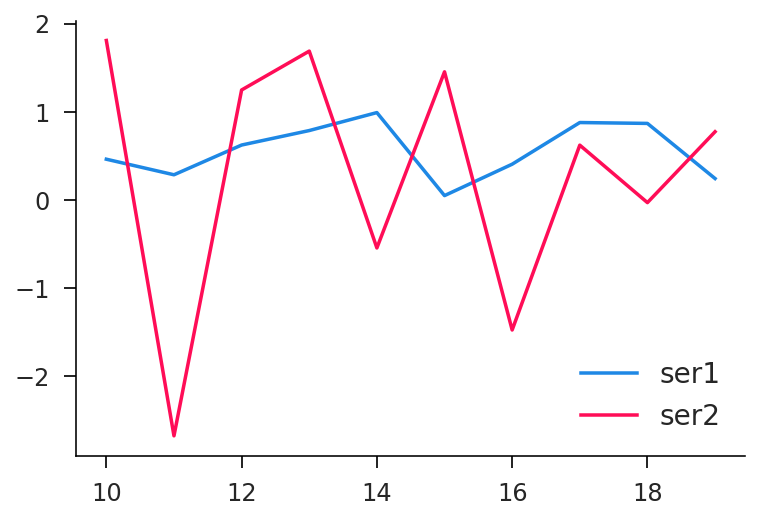

In [10]:
df.plot();

In [11]:
df['ser1']

10    0.461855
11    0.285297
12    0.622447
13    0.786620
14    0.990212
15    0.049320
16    0.405263
17    0.877455
18    0.867578
19    0.242705
Name: ser1, dtype: float64

In [12]:
df['ser1'] > 0.5

10    False
11    False
12     True
13     True
14     True
15    False
16    False
17     True
18     True
19    False
Name: ser1, dtype: bool

In [13]:
df1 = df[df['ser1']>0.5]
df1

,ser1,ser2
12,0.622447,1.246404
13,0.786620,1.687012
14,0.990212,-0.544014
17,0.877455,0.621147
18,0.867578,-0.030074


In [14]:
df.query('ser1 > 0.5')

,ser1,ser2
12,0.622447,1.246404
13,0.786620,1.687012
14,0.990212,-0.544014
17,0.877455,0.621147
18,0.867578,-0.030074


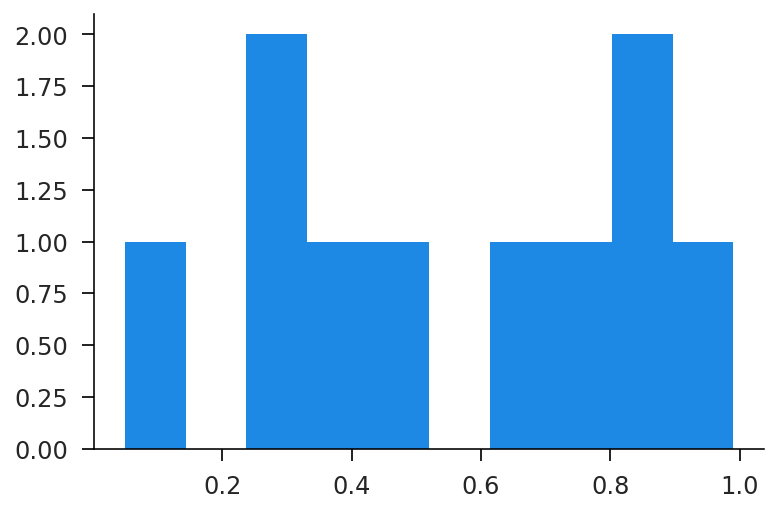

In [15]:
df['ser1'].hist(grid=False);

## Grouping Data

In [16]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block]+np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [17]:
df.head(10)

,block,value
0,0,0.136317
1,1,0.204176
2,2,0.311801
3,2,0.145844
4,0,-0.384090
5,2,0.860225
6,1,0.187944
7,1,0.273722
8,1,0.218402
9,1,0.002928


In [18]:
df.groupby('block').size()

block
0    27
1    27
2    23
3    23
dtype: int64

In [19]:
df.groupby('block')['value'].mean()

block
0    0.065091
1    0.187718
2    0.238390
3    0.374453
Name: value, dtype: float64

In [20]:
df.groupby('block')['value'].std()

block
0    0.247389
1    0.094031
2    0.528666
3    0.154575
Name: value, dtype: float64

In [21]:
df.groupby('block')['value'].apply(lambda x: np.mean(np.abs(x-np.mean(x))))

block
0    0.210178
1    0.068565
2    0.423524
3    0.128162
Name: value, dtype: float64

In [22]:
grp = df.groupby('block')['value']
pd.DataFrame({
    'mean': grp.mean(),
    'stdv': grp.std(),
    'absd': grp.apply(lambda x: np.mean(np.abs(x-np.mean(x))))
})

,mean,stdv,absd
block,,,
0,0.065091,0.247389,0.210178
1,0.187718,0.094031,0.068565
2,0.238390,0.528666,0.423524
3,0.374453,0.154575,0.128162


## Time Series

In [23]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [24]:
days = pd.date_range('2016-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [25]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(N))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')
df.head()

,price
date,
2016-01-01,-0.002071
2016-01-02,0.004067
2016-01-03,-0.000139
2016-01-04,0.002650
2016-01-05,-0.001342


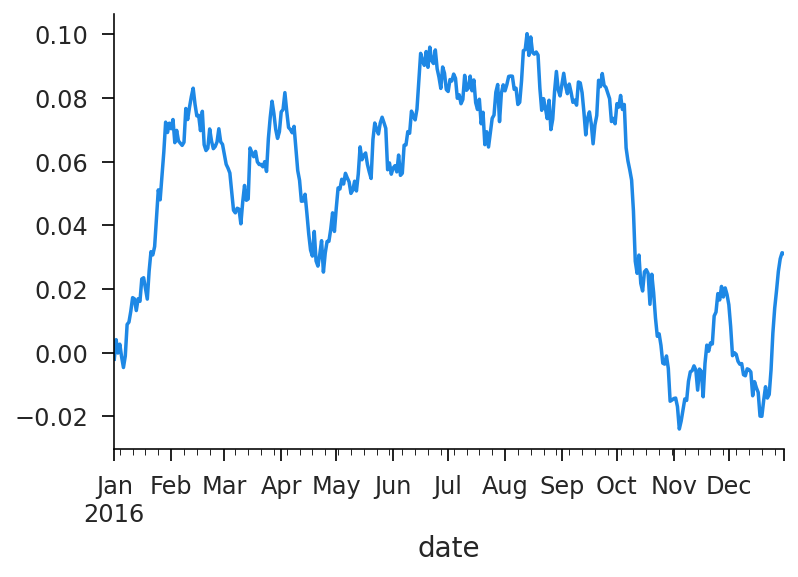

In [26]:
df['price'].plot();

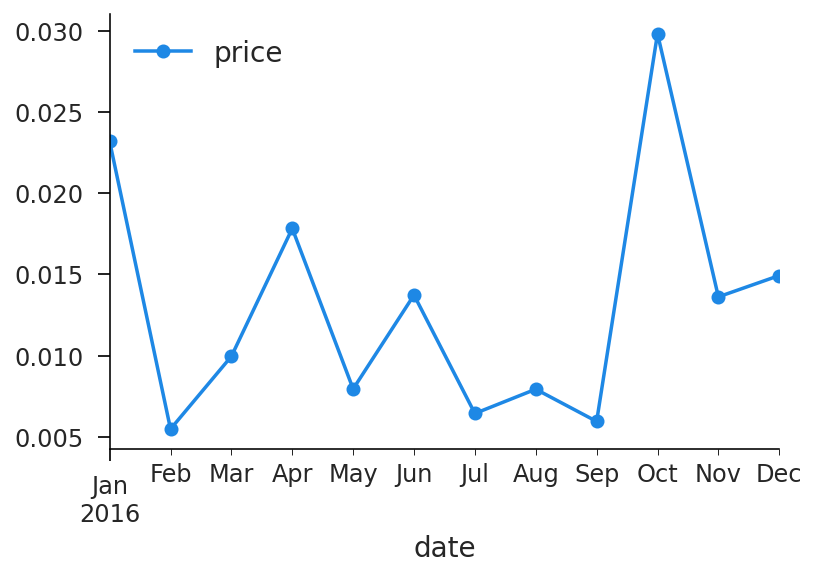

In [27]:
df.groupby(pd.Grouper(freq='MS')).std().plot(marker='o');

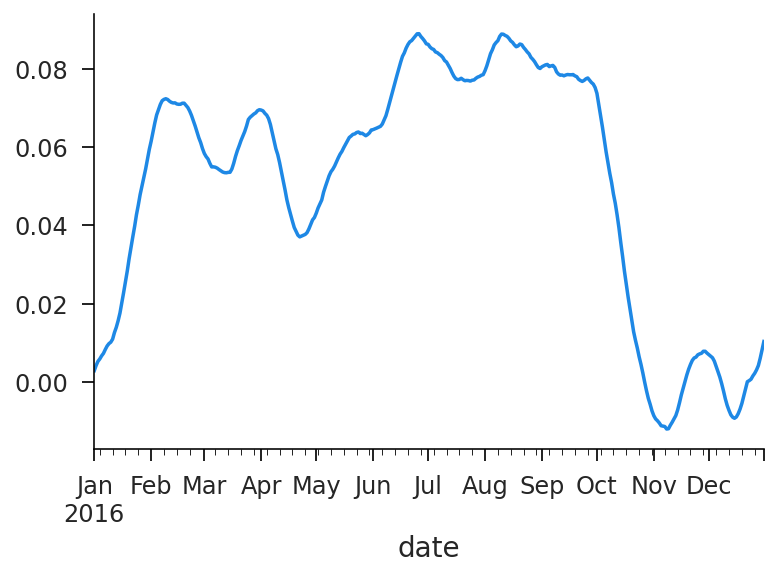

In [28]:
df.rolling(20, center=True, min_periods=5).mean().plot(legend=False);

## Transforming

In [29]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [30]:
days = pd.date_range('2006-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [31]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(len(days)))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')

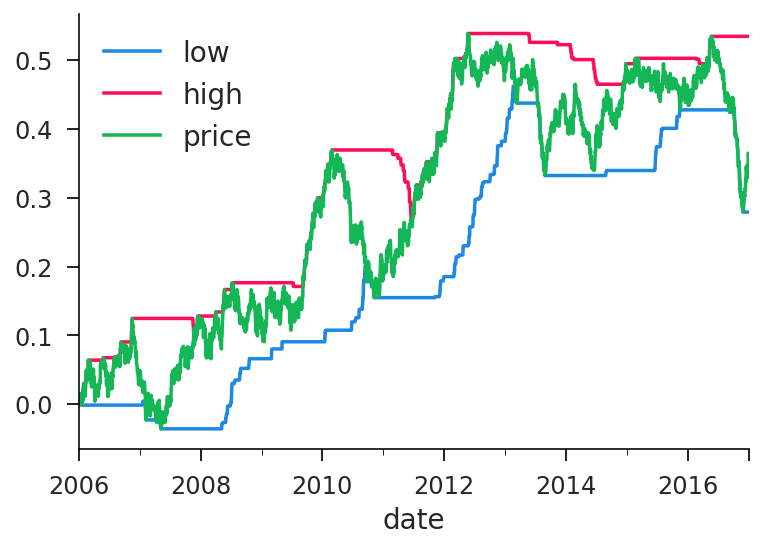

In [32]:
roll = df['price'].rolling(52*7, min_periods=1)
pd.DataFrame({
    'low' : roll.min(),
    'high': roll.max(),
    'price': df['price']
}).plot();

## Plotting

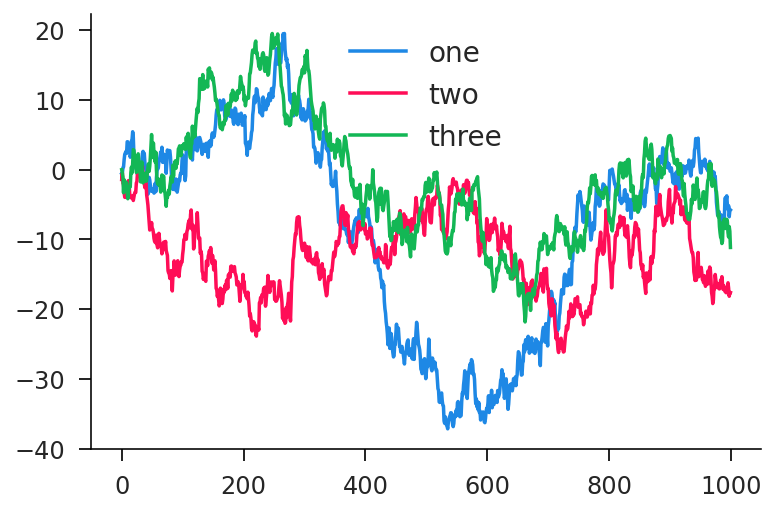

In [33]:
# good way to arrange plots
pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
}).plot();

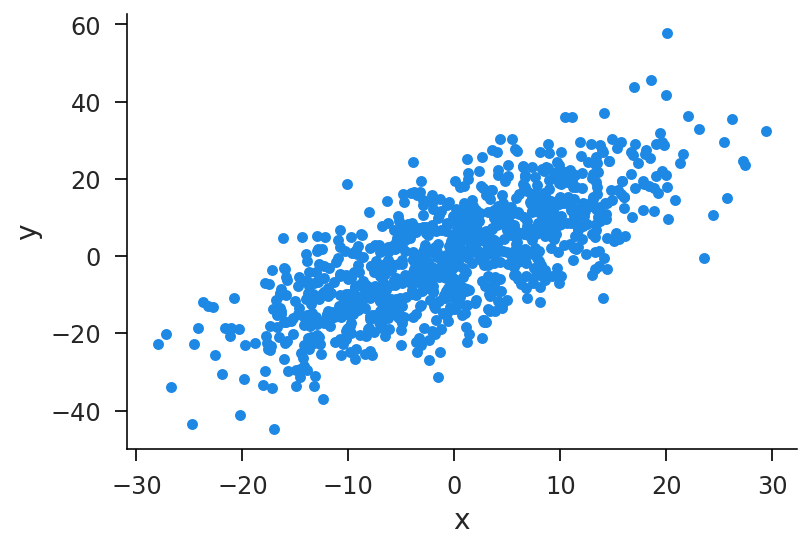

In [34]:
x = 10*np.random.randn(1000)
y = x + 10*np.random.randn(1000)
df = pd.DataFrame({
    'x': x,
    'y': y
})
df.plot.scatter(x='x', y='y');

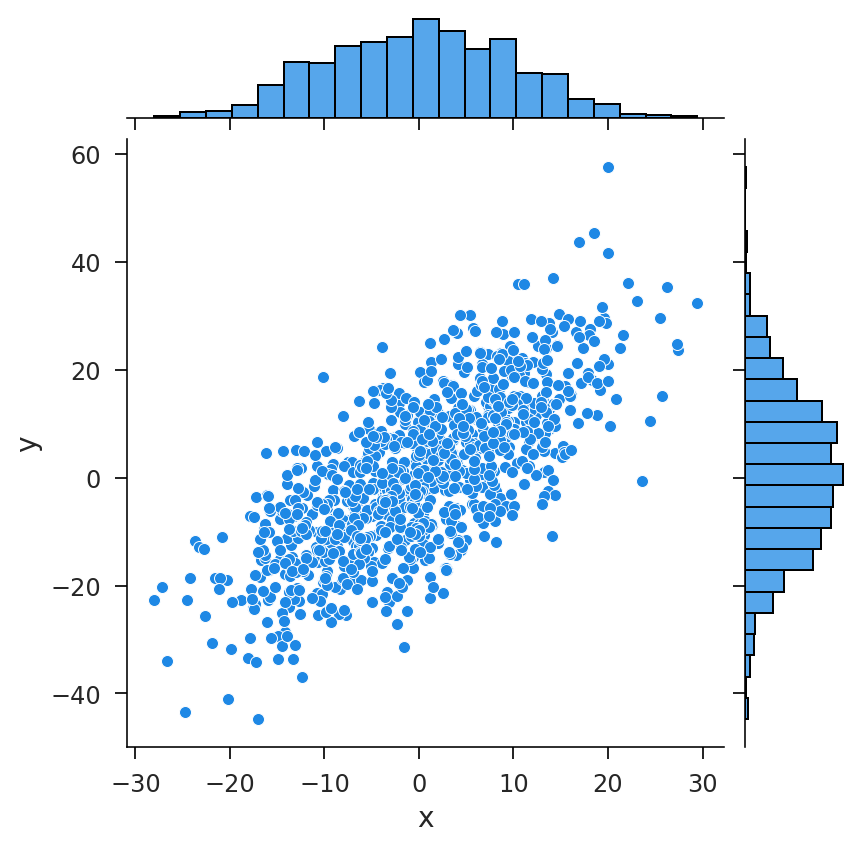

In [35]:
sns.jointplot(x='x', y='y', data=df);

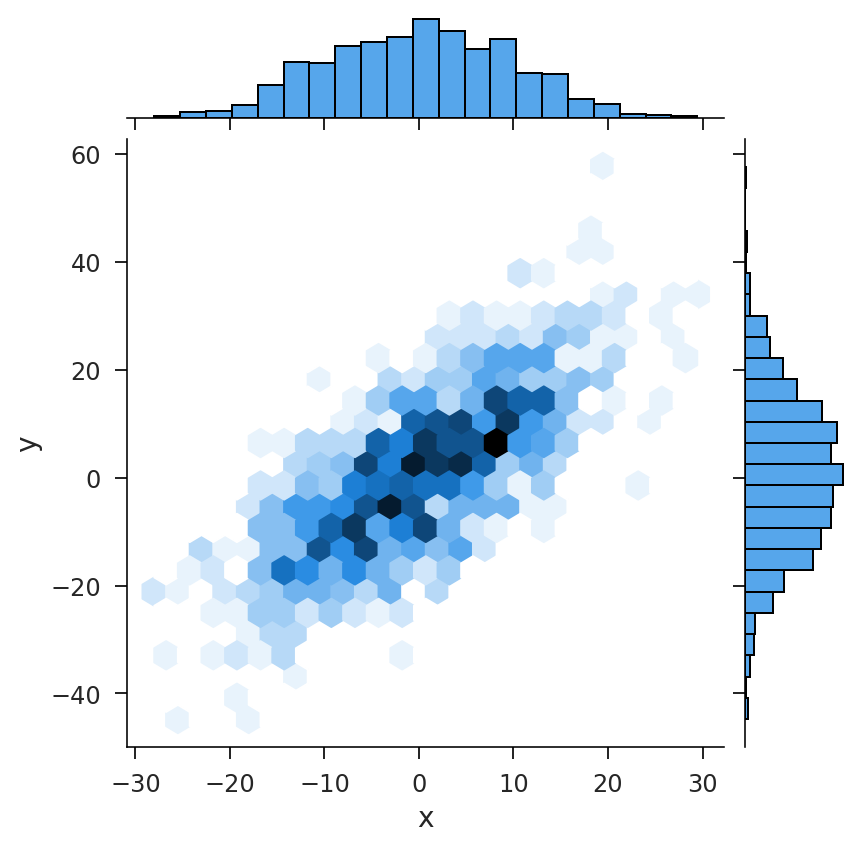

In [36]:
# kind in ['scatter', 'reg', 'resid', 'kde', 'hex']
sns.jointplot(x='x', y='y', kind='hex', data=df);

## Indexing

In [37]:
df = pd.DataFrame({
    'a': np.arange(10),
    'b': np.random.rand(10)
}, index=np.arange(10, 20))
df

,a,b
10,0,0.412077
11,1,0.752280
12,2,0.893464
13,3,0.476590
14,4,0.333531
15,5,0.106158
16,6,0.781324
17,7,0.618823
18,8,0.133379
19,9,0.464388


In [38]:
# slicing on index
df.loc[14]

a    4.000000
b    0.333531
Name: 14, dtype: float64

In [39]:
# slicing on location
df.iloc[4]

a    4.000000
b    0.333531
Name: 14, dtype: float64

In [40]:
# slicing on column
df['a']

10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
19    9
Name: a, dtype: int64

In [41]:
# selecting
df[df['a']>5]

,a,b
16,6,0.781324
17,7,0.618823
18,8,0.133379
19,9,0.464388


In [42]:
# advanced selecting
df[(df['a']>3)&(df['a']<8)]

,a,b
14,4,0.333531
15,5,0.106158
16,6,0.781324
17,7,0.618823


In [43]:
# selection mechanism
df['a'] > 3

10    False
11    False
12    False
13    False
14     True
15     True
16     True
17     True
18     True
19     True
Name: a, dtype: bool

In [44]:
# querying
df.query('a > 3 and a < 8')

,a,b
14,4,0.333531
15,5,0.106158
16,6,0.781324
17,7,0.618823


## Joining

In [45]:
mapp = pd.Series({x: 2*x for x in range(10)}, name='twox')
mapp

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
Name: twox, dtype: int64

In [46]:
init = pd.DataFrame({
    'ser': np.random.randint(10, size=100),
    'val': np.random.rand(100)
})
init.head()

,ser,val
0,3,0.898203
1,0,0.372892
2,9,0.206120
3,6,0.480217
4,7,0.989211


In [47]:
final = init.join(mapp, on='ser')
final.head()

,ser,val,twox
0,3,0.898203,6
1,0,0.372892,0
2,9,0.206120,18
3,6,0.480217,12
4,7,0.989211,14


In [48]:
final['check'] = final['twox'] == 2*final['ser']
final.head()

,ser,val,twox,check
0,3,0.898203,6,True
1,0,0.372892,0,True
2,9,0.206120,18,True
3,6,0.480217,12,True
4,7,0.989211,14,True


In [49]:
print(final['check'].all())

True


### Stack and unstack (and some pivot)

In [50]:
a = [0, 1, 2]
b = [1, 2, 3]
list(zip(a, b))

[(0, 1), (1, 2), (2, 3)]

In [51]:
# this constructs a family structure table
M, N = 5, 12
from itertools import cycle
cmap = list(zip(cycle(range(M)), range(100, 100+N), np.random.rand(N)))
pmap = pd.DataFrame(cmap, columns=['pid', 'cid', 'income'])
pmap = pmap.sort_values('pid').reset_index(drop=True)
pmap

,pid,cid,income
0,0,100,0.609816
1,0,105,0.056362
2,0,110,0.947370
3,1,101,0.841725
4,1,106,0.743145
5,1,111,0.411168
6,2,102,0.860672
7,2,107,0.822229
8,3,103,0.921748
9,3,108,0.920470


In [52]:
# tabulate the order of each child
pmap['order'] = pmap.groupby('pid').cumcount().apply(lambda x: f'child{x}')
ptab = pmap.set_index(['pid', 'order'])
ptab

cid    income
pid order                
0   child0  100  0.609816
    child1  105  0.056362
    child2  110  0.947370
1   child0  101  0.841725
    child1  106  0.743145
    child2  111  0.411168
2   child0  102  0.860672
    child1  107  0.822229
3   child0  103  0.921748
    child1  108  0.920470
4   child0  104  0.893202
    child1  109  0.342777

In [53]:
fam = ptab.unstack(level=1)
fam

cid                  income                    
order child0 child1 child2    child0    child1    child2
pid                                                     
0      100.0  105.0  110.0  0.609816  0.056362  0.947370
1      101.0  106.0  111.0  0.841725  0.743145  0.411168
2      102.0  107.0    NaN  0.860672  0.822229       NaN
3      103.0  108.0    NaN  0.921748  0.920470       NaN
4      104.0  109.0    NaN  0.893202  0.342777       NaN

In [54]:
# the reverse operation gives us (almost) what we started with
fam.stack(level='order')

cid    income
pid order                  
0   child0  100.0  0.609816
    child1  105.0  0.056362
    child2  110.0  0.947370
1   child0  101.0  0.841725
    child1  106.0  0.743145
    child2  111.0  0.411168
2   child0  102.0  0.860672
    child1  107.0  0.822229
3   child0  103.0  0.921748
    child1  108.0  0.920470
4   child0  104.0  0.893202
    child1  109.0  0.342777

In [55]:
# we can do this with pivot too
ptab.reset_index().pivot('pid', 'order', ['cid', 'income'])

cid                  income                    
order child0 child1 child2    child0    child1    child2
pid                                                     
0      100.0  105.0  110.0  0.609816  0.056362  0.947370
1      101.0  106.0  111.0  0.841725  0.743145  0.411168
2      102.0  107.0    NaN  0.860672  0.822229       NaN
3      103.0  108.0    NaN  0.921748  0.920470       NaN
4      104.0  109.0    NaN  0.893202  0.342777       NaN

## Networks

In [56]:
import networkx as nx

In [57]:
df = pd.DataFrame({
    'src': np.random.randint(10, size=20),
    'dst': np.random.randint(10, size=20),
    'wgt': np.random.exponential(size=20)
})
df = df.drop_duplicates(subset=['src', 'dst'])
df = df.query('src != dst')
df.head()

,src,dst,wgt
0,3,4,1.774524
1,1,3,0.017800
2,6,0,1.617747
3,3,8,1.050828
4,7,3,1.426652


In [58]:
G = nx.Graph()
G.add_nodes_from(np.arange(10))
G.add_weighted_edges_from([(x['src'], x['dst'], x['wgt']) for i, x in df.iterrows()])
# G.add_weighted_edges_from(df[['src', 'dst', 'wgt']].values) # equivalent
G

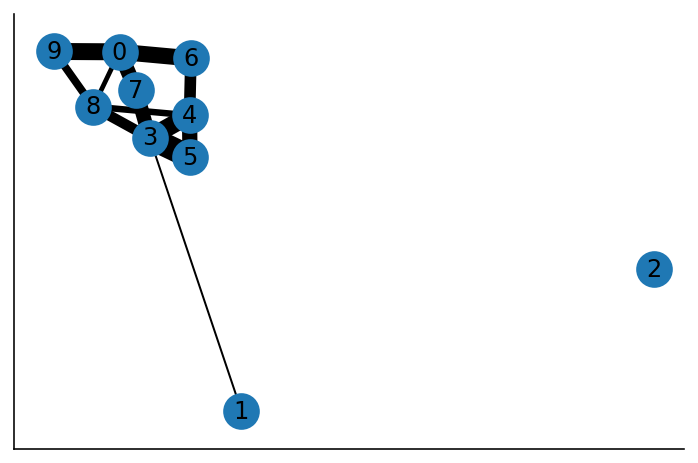

In [59]:
edgewidth = [5*d['weight'] for (u,v,d) in G.edges(data=True)]
pos = nx.spring_layout(G, iterations=50)
nx.draw_networkx(G, pos);
nx.draw_networkx_edges(G, pos, width=edgewidth);

In [60]:
nx.centrality.eigenvector.eigenvector_centrality(G, weight='weight')

{0: 0.2364784677677095,
 1: 0.002223079559139269,
 2: 1.9718728004571382e-20,
 3: 0.5646033907085891,
 4: 0.4673675357052803,
 5: 0.46020381359359114,
 6: 0.20493073275516568,
 7: 0.25667917444608135,
 8: 0.26306107265362955,
 9: 0.13414211924296593}

## Input/Output

In [61]:
df = pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
})
df.to_csv('output/series.csv', index=False)

In [62]:
!head output/series.csv

one,two,three
-0.5857537919909347,-0.3634020385280529,-0.09964342584271259
-0.05117582106564955,-0.2994377047289407,-2.6768957684054353
-1.5521524939093143,0.40163225981916595,-2.843981452236759
-0.4986966001469897,1.1462680225790316,-3.8228326235468213
1.7617532749738376,0.4408759278425729,-3.0683479538149045
3.1388383896821344,-0.09137122665558295,-2.3469115849985465
3.463120600261029,-0.1494215473787246,-3.4875505110369582
1.3962775126750544,0.5294449258103989,-4.099455450291718
0.9882446723180328,1.1226700713800248,-3.6053066891115515


In [63]:
df = pd.read_csv('output/series.csv')
df.head()

,one,two,three
0,-0.585754,-0.363402,-0.099643
1,-0.051176,-0.299438,-2.676896
2,-1.552152,0.401632,-2.843981
3,-0.498697,1.146268,-3.822833
4,1.761753,0.440876,-3.068348


Can also use the many `pd.DataFrame.to_*` and `pd.read_*` function where `*` is one of:
- csv
- excel
- parquet
- json
- html
- latex
- stata
- sql

Parquet is relatively new and interesting! It is fast but not as heavy as SQL, but it also doesn't suffer from the same typing issues that CSV sometimes does.

## External Data

In [64]:
import pandas_datareader as pdr

In [65]:
emp = pdr.fred.FredReader(['UNRATE', 'LNS12300060'], start='1948-01-01').read()
emp = emp.rename(columns={'UNRATE': 'unemp', 'LNS12300060': 'empop'}).rename_axis('date')
emp.head()

,unemp,empop
date,,
1948-01-01,3.4,62.6
1948-02-01,3.8,62.7
1948-03-01,4.0,62.6
1948-04-01,3.9,62.9
1948-05-01,3.5,62.5


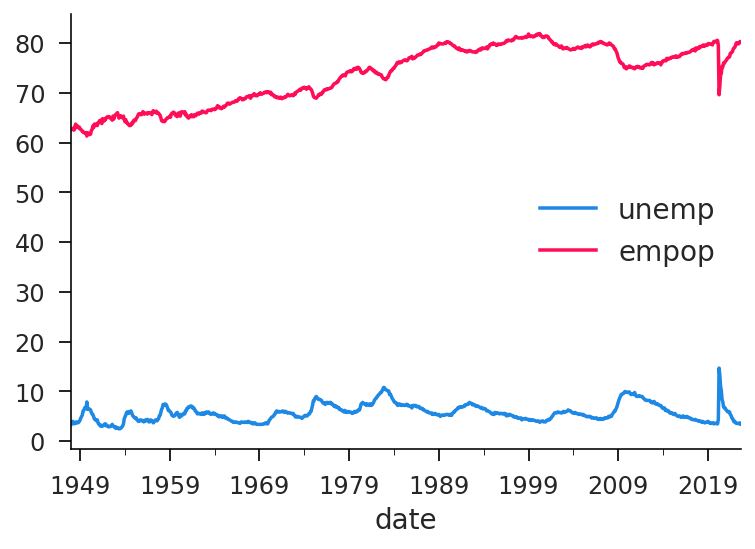

In [66]:
emp.plot();

In [67]:
# detrender
def detrend(s):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    ret = smf.ols(f'{name} ~ 1 + year', data=df.reset_index()).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

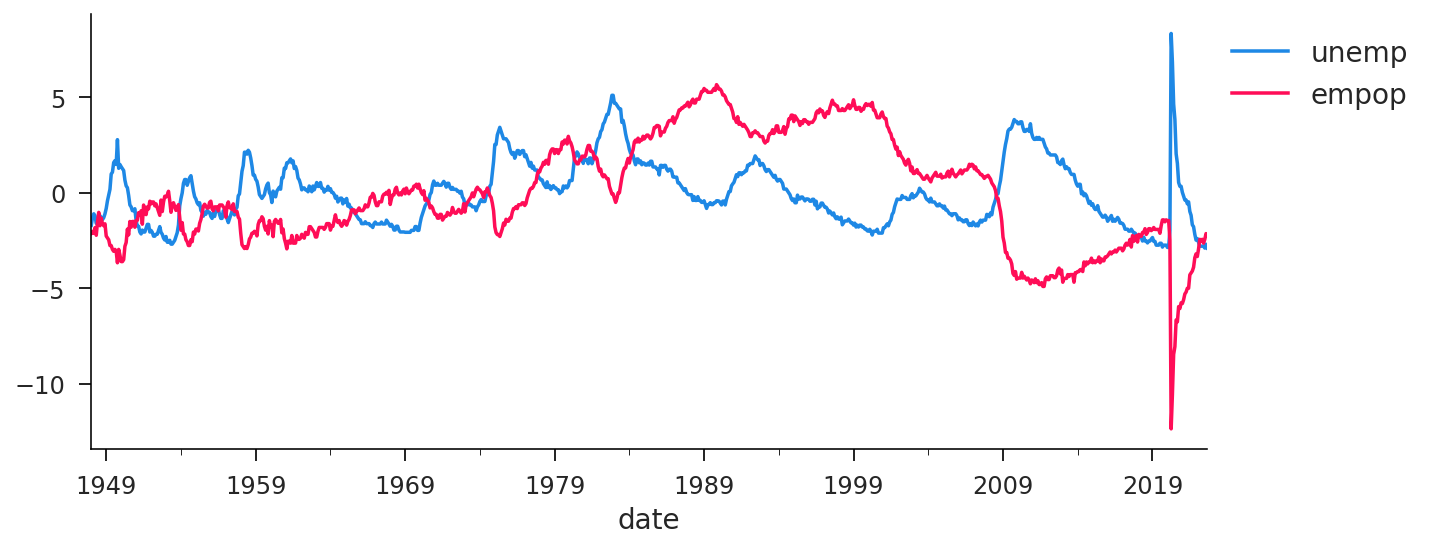

In [68]:
emp.apply(detrend).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [69]:
# detrend poly!
def detrendn(s, deg=1):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    df['zyear'] = df['year'] - df['year'].min()
    reg = []
    for n in range(deg+1):
        ds = f'year{n}'
        df[ds] = df['zyear']**n
        reg.append(ds)
    reg = f'{name} ~ ' + ' + '.join(reg)
    ret = smf.ols(reg, data=df).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

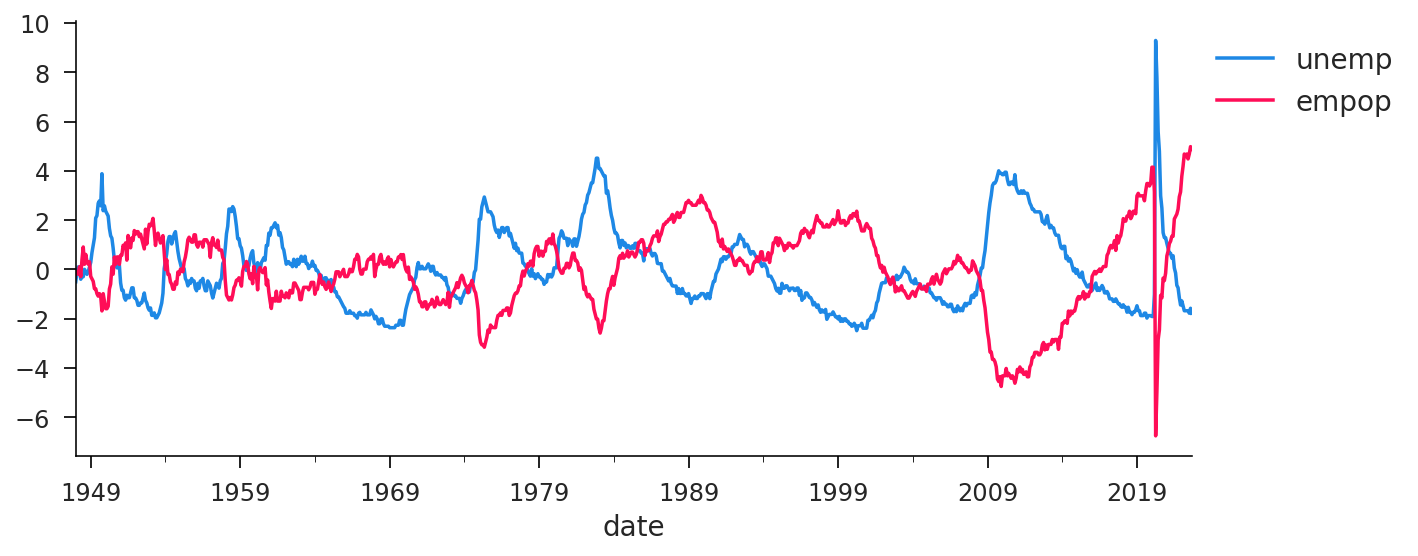

In [70]:
emp.apply(lambda s: detrendn(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [71]:
# let's not reinvent the wheel
def detrendn1(s, deg=1):
    year = s.index.year
    zyear = year - year.min()
    coef = np.polyfit(zyear, s, deg)
    vals = np.polyval(coef, zyear)
    pred = pd.Series(vals, index=s.index, name=s.name)
    return s - pred

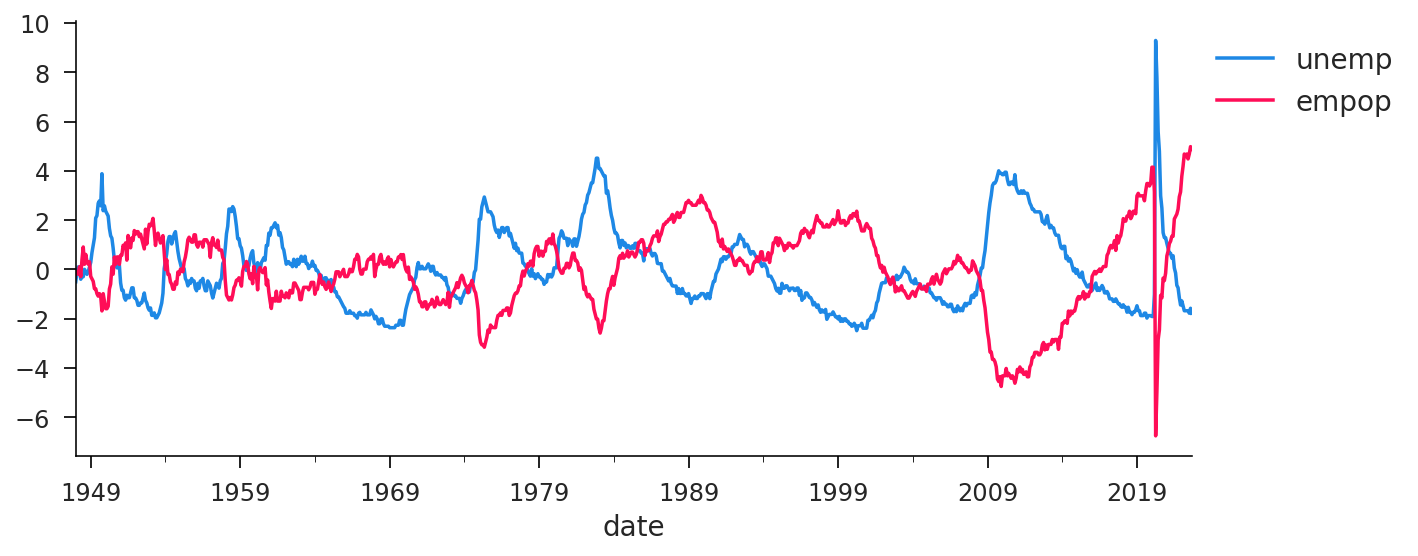

In [72]:
emp.apply(lambda s: detrendn1(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

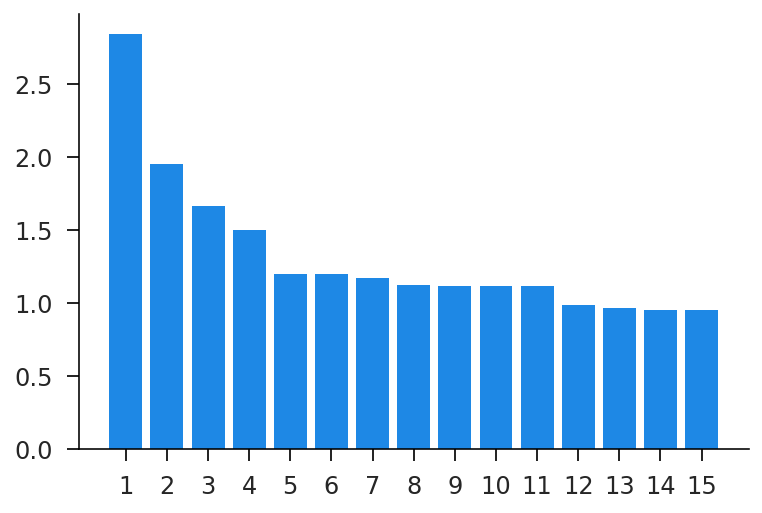

In [73]:
dvec = np.arange(1, 15+1)
plt.bar(dvec, [np.std(detrendn1(emp['empop'], deg=d)) for d in dvec]);
plt.xticks(dvec);

# Regressions

In [74]:
import statsmodels.formula.api as smf

## Basic

In [75]:
N = 100
x = np.random.randn(N)
y = 3*np.random.randn(N)
z = 1 + 2*x + 3*y + 4*x*y + np.random.randn(N)
df0 = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z
})

In [76]:
ret = smf.ols('z ~ 1 + x + y', data=df0).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     10.25
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           9.12e-05
Time:                        14:40:38   Log-Likelihood:                -398.27
No. Observations:                 100   AIC:                             802.5
Df Residuals:                      97   BIC:                             810.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1943      1.329      2.404      0.018       0.557       5.831
x             -1.2381      1.350     -0.917      0.361      -3.917       1.440
y              1.9082      0.421      4.529      0.000       1.072       2.745
==============================================================================
Omnibus:                       43.094   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.009
Skew:                           1.488   Prob(JB):                     3.56e-29
Kurtosis:                       7.753   Cond. No.                         3.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
ret.params

Intercept    3.194332
x           -1.238085
y            1.908244
dtype: float64

In [78]:
ret = smf.ols('z ~ 1 + x*y', data=df0).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     8142.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):          2.22e-115
Time:                        14:40:39   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             269.4
Df Residuals:                      96   BIC:                             279.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1870      0.093     12.755      0.000       1.002       1.372
x              1.8412      0.096     19.198      0.000       1.651       2.032
y              2.9664      0.030     98.531      0.000       2.907       3.026
x:y            3.9793      0.028    141.936      0.000       3.924       4.035
==============================================================================
Omnibus:                        4.267   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.651
Skew:                           0.446   Prob(JB):                        0.161
Kurtosis:                       3.283   Cond. No.                         4.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

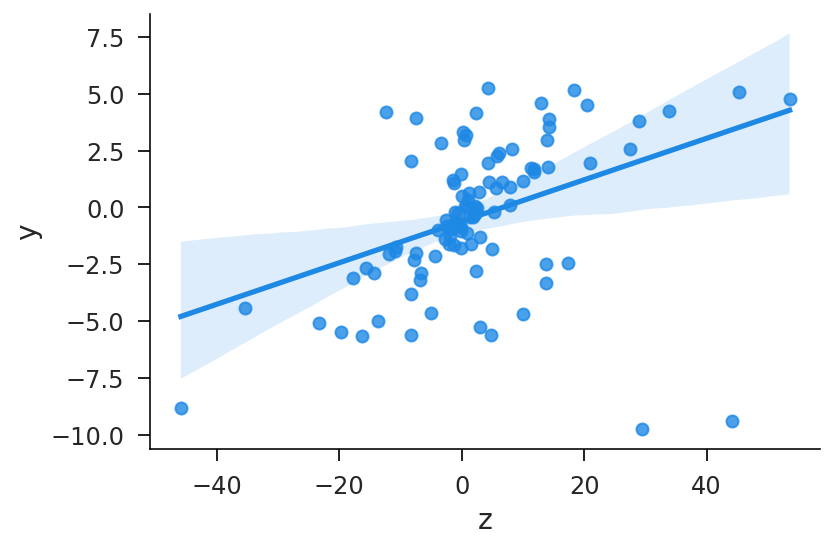

In [79]:
sns.regplot(x='z', y='y', data=df0);

## Categorical

In [80]:
import fastreg as fr
from fastreg import I, R, C

In [81]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block] + np.random.randn(N)*cvars[block]
df1 = pd.DataFrame({
    'block': block,
    'value': value
})

In [82]:
fr.ols(y=R.z, x=I+R.x+R.y, data=df0)

z,coeff,stderr,low95,high95,pvalue
I,3.194332,1.328708,0.590113,5.798551,0.016213
x,-1.238085,1.349542,-3.883137,1.406968,0.358927
y,1.908244,0.421363,1.082388,2.734100,0.000006


In [83]:
fr.ols(y=R.z, x=I+R.x+R.y+R.x*R.y, data=df0)

z,coeff,stderr,low95,high95,pvalue
I,1.186982,0.093060,1.004587,1.369376,0.0
x,1.841238,0.095907,1.653263,2.029213,0.0
y,2.966390,0.030106,2.907383,3.025398,0.0
x*y,3.979254,0.028035,3.924305,4.034203,0.0


In [84]:
fr.ols(y=R.value, x=I+C.block, data=df1)

value,coeff,stderr,low95,high95,pvalue
I,0.078322,0.046623,-0.013058,0.169701,0.092978
block=1,0.140734,0.069779,0.003970,0.277498,0.043710
block=2,0.241754,0.071439,0.101737,0.381771,0.000714
block=3,0.317700,0.073366,0.173906,0.461494,0.000015


## Bootstrapping

In [85]:
from sklearn.utils import resample

In [86]:
def gen_block_data(N, cmean, cvars):
    cmean = np.array(cmean)
    cvars = np.array(cvars)
    block = np.random.randint(len(cmean), size=N)
    value = cmean[block] + np.random.randn(N)*cvars[block]
    return pd.DataFrame({
        'block': block,
        'value': value
    })

In [87]:
N = 100
K = 1000
cmean = [0.1, 0.2, 0.3, 0.4]
cvars = [0.2, 0.1, 0.5, 0.2]
mygen = lambda: gen_block_data(N, cmean, cvars)
myy, myx = R.value, C.block(drop=fr.NONE)
data0 = mygen()
mysamp = lambda: resample(data0)

In [88]:
res = fr.ols(y=myy, x=myx, data=data0)
stderr_reg = res['stderr']

In [89]:
res = fr.ols(y=myy, x=myx, data=data0, stderr='hc3')
stderr_rob = res['stderr']

In [90]:
res = pd.DataFrame({i: fr.ols(y=myy, x=myx, data=mygen())['coeff'] for i in range(K)}).T
stderr_bsp0 = res.std()

In [91]:
res = pd.DataFrame({i: fr.ols(y=myy, x=myx, data=mysamp())['coeff'] for i in range(K)}).T
stderr_bsp = res.std()

In [92]:
pd.DataFrame({
    'stderr_reg': stderr_reg,
    'stderr_rob': stderr_rob,
    'stderr_bsp0': stderr_bsp0,
    'stderr_bsp': stderr_bsp
}).T

,block=0,block=1,block=2,block=3
stderr_reg,0.054942,0.059017,0.056870,0.075232
stderr_rob,0.038832,0.018255,0.094963,0.053458
stderr_bsp0,0.040304,0.020021,0.098391,0.042015
stderr_bsp,0.038952,0.017982,0.093369,0.052420


## MAPS

You'll need some external data for this part. Head on over to: https://dataverse.harvard.edu/dataverse/chgis_v6. Then click on the "V6 Time Series Prefecture Polygons" element and download `v6_time_pref_pgn_utf_wgs84.zip` to the `data/china_maps_history` folder.

In [93]:
import geopandas as gpd
from ipywidgets import interact, IntSlider

In [94]:
pref_hist = gpd.read_file('data/china_maps_history/v6_time_pref_pgn_utf_wgs84.zip')
pref_hist = pref_hist.rename(columns={
    'NAME_CH': 'name_zh',
    'NAME_PY': 'name_en',
    'BEG_YR': 'beg_yr',
    'END_YR': 'end_yr'
})[['name_zh', 'name_en', 'beg_yr', 'end_yr', 'geometry']]
print(len(pref_hist))
pref_hist.head()

3830


,name_zh,name_en,beg_yr,end_yr,geometry
0,辽州,Liao Zhou,1151,1217,"POLYGON ((113.54941 36.75454, 113.54329 36.752..."
1,沁州,Qin Zhou,1129,1217,"MULTIPOLYGON (((112.00320 36.84234, 112.00954 ..."
2,霍州,Huo Zhou,1772,1911,"MULTIPOLYGON (((111.85910 36.44626, 111.86777 ..."
3,南泽州,Nanzhe Zhou,1128,1150,"POLYGON ((113.23645 35.44530, 113.22804 35.444..."
4,泽州,Zezhou Fu,1151,1217,"POLYGON ((113.23645 35.44530, 113.22804 35.444..."


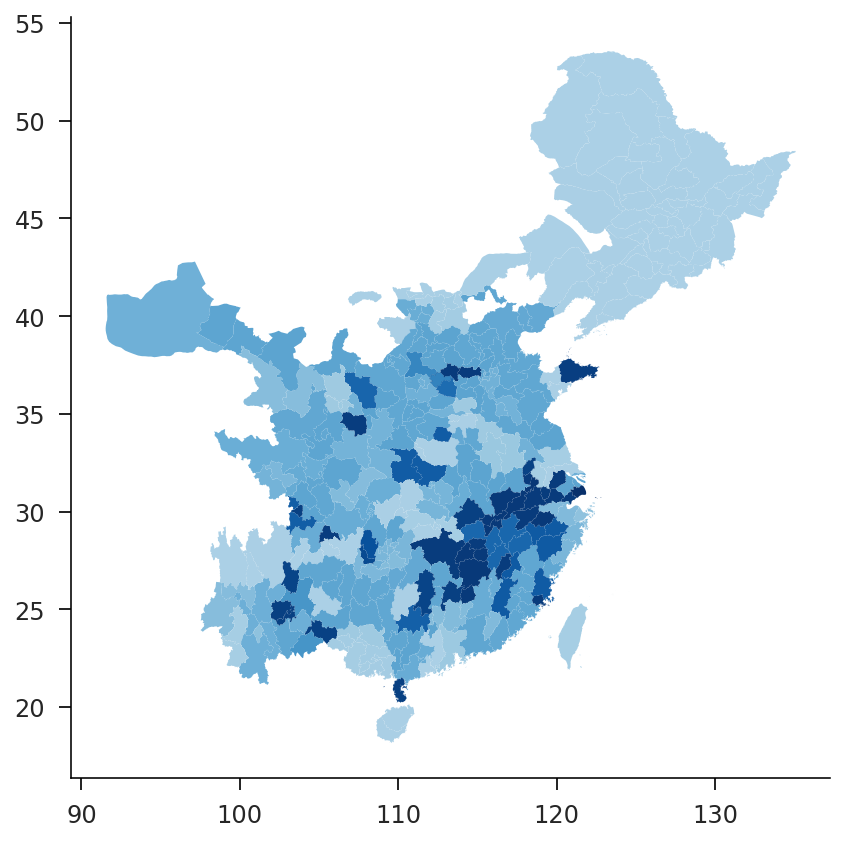

In [95]:
pref_1911 = pref_hist.query('beg_yr < 1911 and end_yr >= 1911')
pref_1911.plot(column='beg_yr', cmap='Blues_r', vmax=2200, figsize=(7, 7));

In [96]:
def plot_year(yr):
    df = pref_hist.query(f'beg_yr <= {yr} and end_yr >= {yr}')
    df['age'] = yr - df['beg_yr']
    yrmax = df['age'].max()
    fig, ax = plt.subplots(figsize=(7, 7))
    df.plot(column='age', cmap='Blues', ax=ax, vmin=-100, vmax=600);
    ax.set_xlim(85, 135)
    ax.set_ylim(15, 50)
    ax.set_aspect('equal')
interact(plot_year, yr=IntSlider(min=-224, max=1911, value=1900));

interactive(children=(IntSlider(value=1900, description='yr', max=1911, min=-224), Output()), _dom_classes=('w…

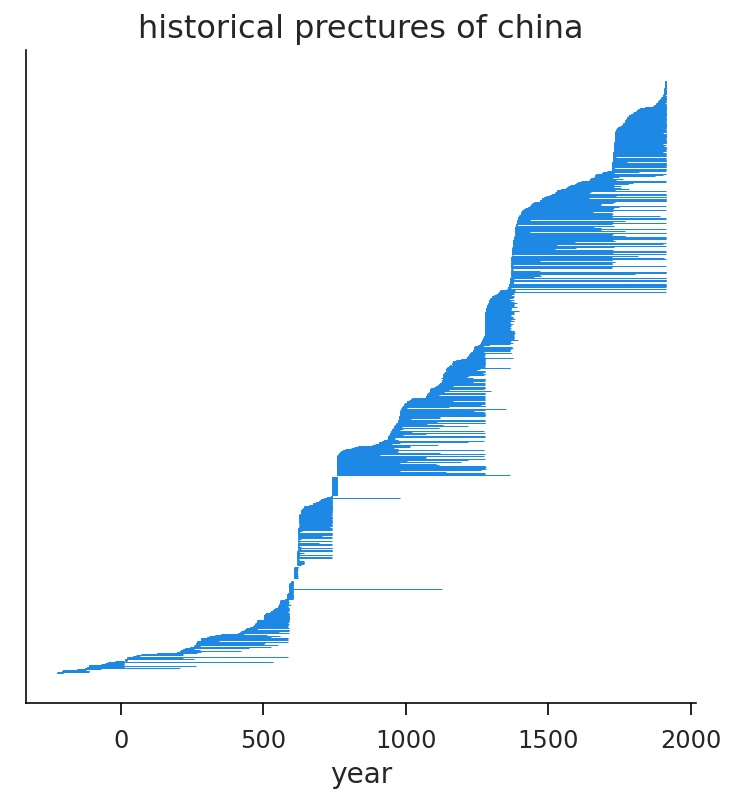

In [97]:
fig, ax = plt.subplots(figsize=(6, 6))
pref_range = pref_hist.sort_values('beg_yr')[['beg_yr', 'end_yr']].set_index(np.arange(len(pref_hist)))
for (i, (b, e)) in pref_range.iterrows():
    ax.hlines(i, b, e, linewidth=0.5)
ax.yaxis.set_visible(False);
ax.set_xlabel('year');
ax.set_title('historical prectures of china');

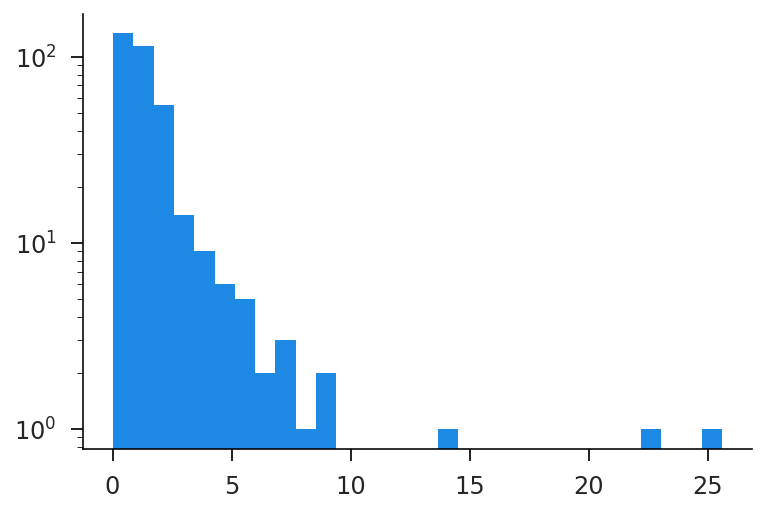

In [98]:
pref_hist.query('end_yr == 1911').area.hist(log=True, bins=30, grid=False);

### Advanced

Here you'll need the shapefiles for modern Chinese prefectures. Head on over to https://data.humdata.org/dataset/cod-ab-chn. Then download `chn_adm_ocha_2020_SHP.zip`, place it in the `data/china_maps_modern` directory, and unzip it.

In [99]:
year = 1776
pref_old = pref_hist.query(f'beg_yr <= {year} and end_yr >= {year}')
pref_old = pref_old[pref_old.is_valid]
pref_old.head()

,name_zh,name_en,beg_yr,end_yr,geometry
2,霍州,Huo Zhou,1772,1911,"MULTIPOLYGON (((111.85910 36.44626, 111.86777 ..."
184,郧阳府,Yunyang Fu,1476,1911,"POLYGON ((110.91881 31.66655, 110.90642 31.662..."
185,襄阳府,Xiangyang Fu,1476,1911,"POLYGON ((112.65113 31.66701, 112.65419 31.657..."
186,德安府,De'an Fu,1729,1911,"POLYGON ((113.91801 31.39151, 113.91645 31.384..."
187,汉阳府,Hanyang Fu,1763,1911,"POLYGON ((114.35085 30.68763, 114.35251 30.686..."


In [100]:
pref_new = gpd.read_file('data/china_maps_modern/chn_admbnda_adm2_ocha_2020.shp')
pref_new = pref_new.rename(columns={
    'ADM2_ZH': 'name_zh',
    'ADM2_EN': 'name_en',
})[['name_zh', 'name_en', 'geometry']]
pref_new.head()

,name_zh,name_en,geometry
0,克拉玛依市,Karamay,"POLYGON ((85.26975 45.29042, 85.29748 45.25837..."
1,昌吉回族自治州,Changji Hui Autonomous Prefecture,"POLYGON ((91.57898 45.05081, 91.53255 44.96698..."
2,石河子市[1],Shihezi,"POLYGON ((86.10937 44.26667, 86.11806 44.11220..."
3,锡林郭勒盟,Xilingol League,"POLYGON ((119.78428 46.64984, 119.86729 46.598..."
4,本溪市,Benxi,"POLYGON ((125.53547 40.92808, 125.46792 40.922..."


In [101]:
# choose a random modern prefecture
pref_samp = pref_new.query('name_zh == "成都市"')
name_zh, name_en = pref_samp.iloc[0][['name_zh', 'name_en']]
print(name_zh, name_en)

成都市 Chengdu


In [102]:
# efficiently find the intersection with old provinces
xmin, ymin, xmax, ymax = pref_samp.iloc[[0]].total_bounds
old_subset = pref_old.cx[xmin:xmax, ymin:ymax]
print(len(old_subset))
inter = gpd.overlay(old_subset[['name_en', 'name_zh', 'geometry']], pref_samp, how='intersection')
print(inter[['name_en_1', 'name_zh_1']].drop_duplicates())

9
      name_en_1 name_zh_1
0       Zi Zhou        资州
1    Chengdu Lu       成都府
2  Tongchuan Fu       潼川府
3      Mei Zhou        眉州
4    Qiong Zhou        邛州
5      Mao Zhou        茂州
6     Yazhou Fu       雅州府


In [103]:
from matplotlib import font_manager
font = font_manager.FontProperties()
font.set_family('Noto Sans CJK JP')
font.set_size(14)

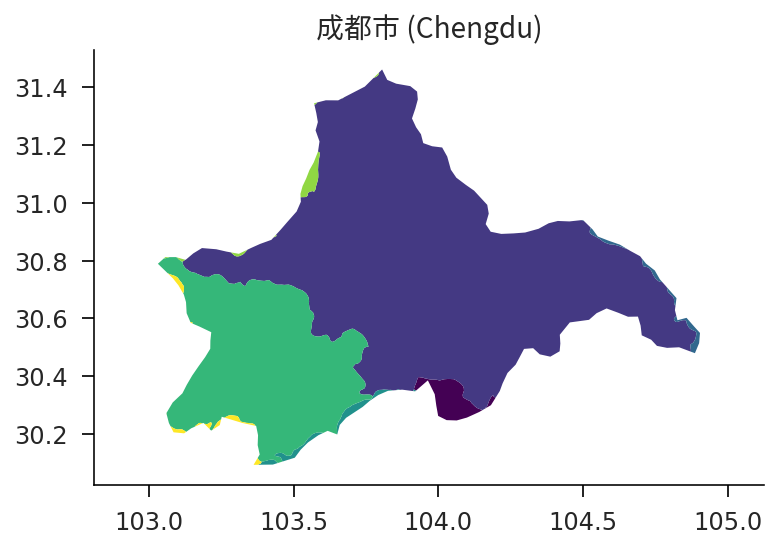

In [104]:
inter1 = inter[inter.area>0.001]
inter1['index'] = np.arange(len(inter1))
inter1.plot(column='index', cmap='viridis');
plt.title(f'{name_zh} ({name_en})', fontproperties=font);
plt.axis('equal');